# 비지도 학습

### 비지도 학습(Unsupervised Learning)에 대하여

비지도학습이란, 지도학습과 달리 training data로 정답(label)이 없는 데이터가 주어지는 학습방법을 말한다. 다르게 말하면, 비지도 학습은 주어진 데이터가 어떻게 구성되어 있는지 스스로 알아내는 방법이라고 말할 수 있다. 아무도 정답을 알려주지 않은 채 오로지 데이터셋의 특징(feature) 및 패턴을 기반으로 모델 스스로가 판단하는 것이다.

지도학습의 대표적인 예인 분류(classification) 문제를 살펴보자. 우리는 해당 사진이 강아지인지 고양이인지 판단하는 신경망 분류 모델을 학습하려고 한다. 그렇게 하기 위해서는 이에 적합한 딥러닝 모델과 훈련에 필요한 training datset이 필요한데, 강아지 및 고양이의 사진과 각각의 사진들이 이것은 '강아지'이다. '고양이'이다라고 표시한 label이 필요하다.

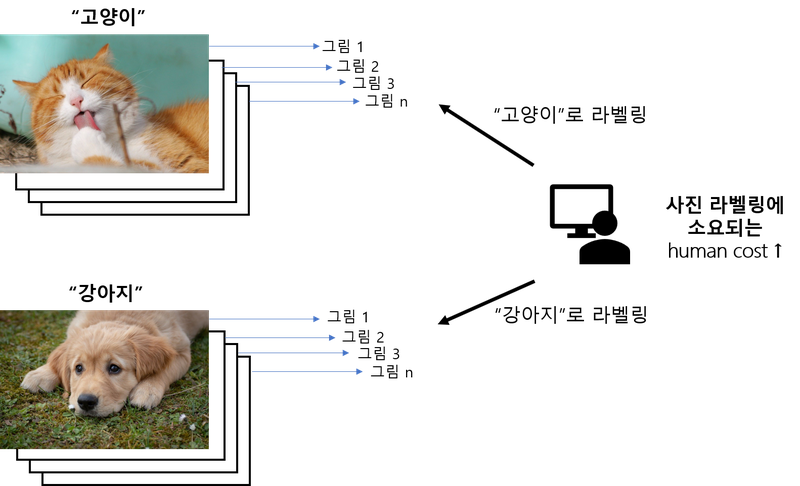

이렇게 모든 데이터셋에 각각에 대한 정보가 명시되어 있으면 좋겠지만, 그렇지 않은 경우가 대부분일뿐더러 라벨링이 되어 있는 데이터셋을 마련하기 위해서는 적지 않은 인적 자원이 소모된다. 결국 어떤 이미지가 고양이 사진이다. 강아지 사진이다라는 정답을 매기는 과정은 인간이 수행해야 하기 때문이다.

이 문제를 해결하기 위해, 라벨링이 되어 있지 않은 데이터들 내에서 비슷한 특징이나 패턴을 가진 데이터들끼리 군집화한 후, 새로운 데이터가 어떤 군집에 속하는지를 추론하는 비지도학습과 같은 방법론이 제시되었다.

비지도학습의 대표적인 예시로는 군집화(클러스터링, clustering)가 있지만, 비지도학습이라는 용어는 정답이 주어지지 않은 데이터를 이용한 학습 전체의 포괄하는 용어이기 때문에 클러스터링 외에도 차원 축소(dimensionality reduction) 및 이를 이용한 데이터 시각화, 생성 모델(generative model) 등 다양한 task를 포괄하는 개념이다.



### 클러스터링(1) K-means

지도학습 상황과 달리, 비지도학습이 필요한 상황에서는 지도학습 때 당연히 주어지던 몇 가지가 생략되어 있다. 우선은 데이터 X가 무엇인지에 대한 정답(label) y가 없다. 또 없는 게 있다면, y가 될 수 있는 분류 기준(클래스 또는 카테고리)도 없다고 할 수 있다.

군집화란 그렇게 명확한 분류 기준이 없는 상황에서도 데이터들을 분석하여 가까운(또는 유사한)것들끼리 묶어 주는 작업이다. 이를 통해서 개별적인 데이터들을 몇 개의 그룹으로 추상화하여 새로운 의미를 발견해 나갈 수 있게 되었다. 그런데 명ㅇ확한 분류 기준이 없다면 무엇을 기준으로 묶어낼 수 있을까? 가장 쉽게 생각해 볼 수 있는 방법은 k개의 그룹으로 뭉쳐 보라고 하는 것이다. 단 아무렇게나 뭉치진 말고 k개의 기준점을 중심으로 가장 가까운 데이터들을 뭉쳐 보는 방식으로

k-means 알고리즘은 k 값이 주어져 있을 때, 주어진 데이터들을 k개의 클러스터로 묶는 알고리즘으로 대표적인 클러스터링 기법 중 하나이다. 

#### 1. 데이터 생성

우선 모듈을 import하고 5개의 중심점을 기준으로 무작위 점 데이터 100개를 생성해 준다.

In [1]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 중심점이 5개인 100개의 점 데이터를 무작위로 생성합니다.
points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=135)

print(points.shape, points[:10])  # 무작위로 생성된 점의 좌표 10개 출력
print(labels.shape, labels[:10])    # 10개의 점들이 각각 대응하는 중심점(label) 값 출력

(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


비지도학습에는 label이 없다고 했었는데 위 코드에는 label이 등장하고 있다. 임의로 지정한 k개의 중심점이 새로운 label 역활을 하는 것이 K-means의 아이디어이다.

,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


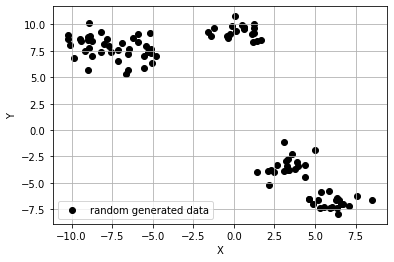

In [3]:
# 축 그리기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 위에서 생성한 점 데이터들을 pandas DataFrame 형태로 변환하기
points_df = pd.DataFrame(points, columns=['X', 'Y'])
display(points_df.head())

# 점 데이터를 X-Y grid에 시각화하기
ax.scatter(points[:, 0], points[:, 1], c='black', label='random generated data')

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

위와 같이 scikit-learn의 make_blob()을 활용하여 중심점이 5개인 무작위의 점 데이터 100개를 생성해보았다. 한눈에 보기에도 위의 데이터들은 5개의 군집을 이루고 있는 것처럼 보인다. 과연 k-means 알고리즘을 적용하여 위 데이터들을 올바르게 군집화할 수 있는 지 알아보자.

#### 2.생성한 데이터에 K-means 알고리즘 적용

이제 K-means 알고리즘을 적용해 보자. 그런데, 데이터들끼리의 거리를 어떻게 측정하는 걸까?

실을 우리는 위에서 자연스럽게 데이터를 X-Y 좌표축 위에 생성했다. 좌표축 위에 존재하는 데이터들 사이의 거리는 쉽게 계산해 낼 수 있다. 피타고라스 정리를 응용하여 계산한 좌표축 사이의 두 점 사이의 직선거리를 유클리드 거리(Euclidian distance) 또는 L2 Distance라고 부른다.

전체적인 K-mean 알고리즘의 순서는 다음과 같이 구성된다.

1. 원하는 클러스터의 수(K)를 결정한다.

2. 무작위로 클러스터의 수와 같은 K개의 중심점(centroid)을 선정한다. 이들은 각각의 클러스터를 대표한다.

3. 나머지 점들과 모든 중심점 간의 유클리드 거리를 계산한 후, 가장 가까운 거리를 가지는 중심점의 클러스터에 속하도록 한다.

4. 각 K개의 클러스터의 중심점을 재조정한다. 특정 클러스터에 속하는 모든 점들의 평균값이 해당 클러스터 다음 iteration의 중심점이 된다.(이 중심점은 실제로 존재하는 데이터가 아니어도 상관없다.)

5. 재조정된 중심점을 바탕으로 모든 점들과 새로 조정된 중심점 간의 유클리드 거리를 다시 계산한 후, 가장 가까운 거리를 가지는 클러스터에 해당 점을 재배정한다.

6. 4번과 5번을 반복 수행한다. 반복의 횟수는 사용자가 적절히 조절하면 되고, 특정 iteration 이상이 되면 수렴(증심점이 더이상 바뀌지 않음)하게 된다.

위 과정을 다음 코드와 함께 차례차례 확인해 보자.

In [5]:
from sklearn.cluster import KMeans

# 1), 2) 위에서 생성한 무작위 점 데이터(points)에 클러스터의 수(K)가 5인 K-means 알고리즘을 적용 
kmeans_cluster = KMeans(n_clusters=5)

# 3) ~ 6) 과정이 전부 함축되어 있는 코드입니다. points에 대하여 K가 5일 때의 K-means iteration을 수행
kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))

<class 'numpy.ndarray'>
(100,)
[0 1 2 3 4]


그럼 K-mean 결과를 시각화해서 확인해 보자.

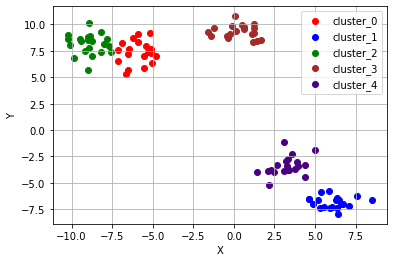

In [6]:
# n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'green', 3:'brown', 4:'indigo'} 

# 점 데이터를 X-Y grid에 시각화합니다.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# K-means clustering의 결과대로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(5):
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster] # 전체 무작위 점 데이터에서 K-means 알고리즘에 의해 군집화된 sub data를 분리합니다. 
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster)) # 해당 sub data를 plot합니다.

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

어떤가? 처음에 우리가 중심점 5개인 무작위 데이터를 생성하고 나서, 이를 K-means 알고리즘을 활용해 5개의 군집으로 분류한 결과가 위와 같다. 우리가 처음에 예상했던 것처럼 5개의 그룹이 잘 분리된 것으로 보아 K-means 알고리즘은 구집의 수만 주어진다면, 데이터의 군집화를 매우 잘 수행한다는 것을 확인할 수 있다. 그런데 사실, K-means 알고리즘이 항상 만능열쇠는 아니다. 주어진 데이터의 분포에 따라 우리가 의도하지 않은 결과를 초래할 수도 있다.

#### 3. K-means 알고리즘이 잘 동작하지 않는 예시들

다음 코드를 통해 어떤 특성의 데이터들이 K-means 알고리즘을 적용하였을 때 잘 군집화되지 않는지 살펴보자.

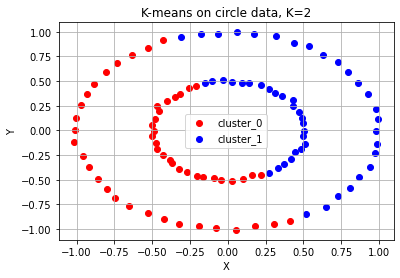

In [7]:
# K-means algorithm이 잘 동작하지 않는 예시 (1) 원형 분포
from sklearn.datasets import make_circles

# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) # 원형 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

첫번째 원형으로 분포되어 있는 데이터 같은 경우는 아마 대부분의 사람들이 '가운데 작은 원'과 '바깥쪽 큰 원' 두개의 군집으로 분류하기를 원했을 것이다. 하지만 K-means 알고리즘은 이 데이터들을 마치 케잌을 칼로 자르듯이 반으로 나눴다.

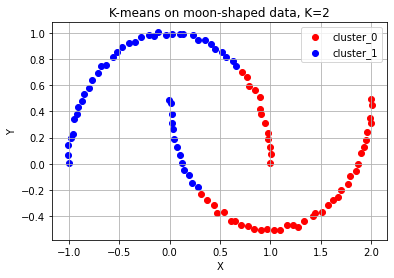

In [8]:
# K-means algorithm이 잘 동작하지 않는 예시 (2) 달 모양 분포
from sklearn.datasets import make_moons

# 달 모양 분포의 데이터 생성
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01) # 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 달 모양 분포 데이터 plot
moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

두번째 초승달 모양의 데이터도 마찬가지다. 두개의 달 형태를 분리해서 군집화하지 않고, 이 역시 y축에 대하여 칼로 자른 형태의 느낌으로 두개의 군집을 나눴다.

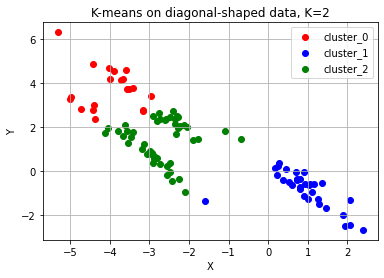

In [9]:
# K-means algorithm이 잘 동작하지 않는 예시 (3) 대각선 모양 분포
from sklearn.datasets import make_circles, make_moons, make_blobs

# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170) #대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)
transformation = [[0.6, -0.6], [-0.4, 0.8]] #대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation) #본 과정을 통해 무작위 분포의 점 데이터를 대각선 분포로 변환합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 대각선 모양 분포 데이터 plot
diag_kmeans = KMeans(n_clusters=3)
diag_kmeans.fit(diag_points)
color_dict = {0: 'red', 1: 'blue', 2: 'green'}
for cluster in range(3):
    cluster_sub_points = diag_points[diag_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on diagonal-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

마지막으로 크게 3개의 대각선 방향으로 나열되어 있는 데이터들 역시 예상대로 군집을 이루지 않는다.

이러한 예시를 통해, K-means 알고리즘은 다음과 같은 상황에서는 적합하지 않은 군집화 알고리즘이라는 것을 알 수 있다.

1. 군집의 개수(K 값)를 미리 지정해야 하기 때문에 이를 알거나 예측하기 어려운 경우에는 사용하기 어렵다.

2. 유클리드 거리가 가까운 데이터끼리 군집이 형성되기 때문에 데이터의 분포에 따라 유클리드 거리가 멀면서 밀접하게 연관되어 있는 데이터들의 군집화를 성공적으로 수행하지 못할 수 있다.

그렇다면 위의 경우처럼 군집의 개수를 명시하지 않으면서도, 밀도 기반으로 군집을 예측하는 방법이 있을까?

### 클러스터링(2) DBSCAN

DBSCAN(Density Based Spatial Clustering of Applications with Noise) 알고리즘은 가장 널리 알려진 밀도 (density) 기반의 군집 알고리즘이다. K-means 알고리즘을 사용하여 해결하기 어려웠던 문제들을 DBSCAN 알고리즘을 활용해 해결할 수 있다. DBSCAN 알고리즘의 가장 큰 특징 중 하나는 군집의 개수, 즉 K-means 알고리즘에서의 K값을 미리 지정할 필요가 없다는 점이다. 또한 유클리드 거리 기반의 K-means 알고리즘 방식과 달리, 조밀하게 몰려 있는 클러스터를 군집화하는 방식을 사용하기 때문에 원 모양의 군집이 아닌 불특정한 형태의 군집도 찾을 수 있다.

클러스터 중심점을 지정하지 않는다면 어떤 방식으로 클러스터링을 하는 걸까? 

K-means 알고리즘과는 달리, 클러스터가 최초의 임의의 점 하나로부터 점점 퍼져나가는데 그 기준이 바로 일정 반경 안의 데이터의 개수, 즉 데이터의 밀도이기 때문이다.

#### DBSCAN 알고리즘의 동작

DBSCAN 알고리즘을 본격적으로 설명하기 전에 DBSCAN을 이해하는 데 필요한 변수와 용어 정리가 필요하다. 각각의 변수 및 용어에 대한 설명은 다음과 같다.

epsilon: 클러스터의 반경

minPts: 클러스터를 이루는 개체의 최솟값

core point: 반경 epsilon 내에 minPts 개 이상의 점이 존재하는 중심점

border point: 군집의 중심이 되지는 못하지만, 군집에 속하는 점

noise point: 군집에 포함되지 못하는 점

K-means에서 K값을 미리 지정해야 했다면, DBSCAN에서는 epsilon과 minPts 값이 미리 지정해 주어야 하는 변수라는 것을 기억해야 한다.

DBSCAN 알고리즘은 다음과 같은 순서로 동작한다

1. 임의의 점 p를 설정하고, p를 포함하여 주어진 클러스터의 반경(elipson) 안에 포함되어 있는 점들의 개수를 센다

2. 만일 해당 원 minPts개 이상의 점이 포함되어 있으면, 해당 점 p를 core point로 간주하고 원에 포함된 점들을 하나의 클러스터로 묶는다.

3. 해당 원에 minPts개 미만의 점이 포함되어 있으면, 일단 pass한다.

4. 모든 점에 대하여 돌아가면서 1~3 번의 과정을 반복하는데, 만일 새로운 점 p'가 core point가 되고 이 점이 기존의 클러스터(p를 core point로 하는)에 속한다면, 두 개의 클러스터는 연결되어 잇다고 하며 하나의 클러스터로 묶어준다.

5. 모든 점에 대하여 클러스터링 과정을 끝냈는데, 어떤 점을 중심으로 하더라도 클러스터에 속하지 못한 점이 있으면 이를 noise point로 간주한다. 또한, 특정 군집에는 속하지만 core point가 아닌 점들을 border point라고 칭한다.

#### 2. DBSCAN 알고리즘 적용해보기

그럼 아래에서 scikit-learn을 활용해서 DBSCAN을 직접 체험해보도록하자. 이전 스텝에서 K-means로는 잘되지 않았던 예시들이 DBSCAN에서는 어떻게 처리되는 지 보자.

# of cluster: 2
DBSCAN Y-hat: [0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0
 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0
 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1]


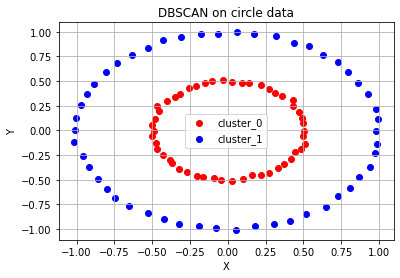

In [10]:
# DBSCAN으로 circle, moon, diagonal shaped data를 군집화한 결과
from sklearn.cluster import DBSCAN

fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

# 원형 분포 데이터 plot
epsilon, minPts = 0.2, 3 # 2)와 3) 과정에서 사용할 epsilon, minPts 값을 설정
circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts) # 위에서 생성한 원형 분포 데이터에 DBSCAN setting
circle_dbscan.fit(circle_points) # 3) ~ 5) 과정을 반복
n_cluster = max(circle_dbscan.labels_)+1 # 3) ~5) 과정의 반복으로 클러스터의 수 도출

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {circle_dbscan.labels_}')

# DBSCAN 알고리즘의 수행결과로 도출된 클러스터의 수를 기반으로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(n_cluster):
    cluster_sub_points = circle_points[circle_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on circle data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 2
DBSCAN Y-hat: [0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1
 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0]


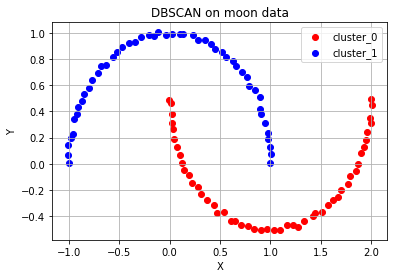

In [11]:
# 달 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.4, 3
moon_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
moon_dbscan.fit(moon_points)
n_cluster = max(moon_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {moon_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = moon_points[moon_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on moon data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 3
DBSCAN Y-hat: [ 0  1  1  0  0  2  2  0  1  2  2  2  0  2  0  1  2  2  2  1  1  1  1  1
  2  2  0  1  0  2  1  0  2  1  2  0  0  0  0  0  1  0  1  0  0  2  1  1
  0  2  1  1  2  1  0  2 -1  2  0  0  2  0  0  1  0  1  1  2  2  2 -1  0
  2  0  0  0  1  2  2 -1  2  2  1  2  0  0  2  1  1  2  1  1  2  0 -1  1
  0  0  0  1]


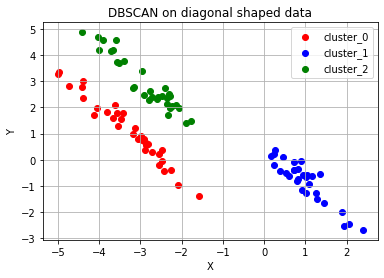

In [12]:
# 대각선 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {diag_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

DBSCAN Y-hat 결과가 -1인 경우가 가끔 눈에 띄는가? 어느 군집에도 포함되지 못한 noise point가 존재한다는 것을 기억해라.

위 코드에서 확인할 수 있듯이, epsilon과 minPts 값을 잘 조절해 주면 DBSCAN 알고리즘에 따라 클러스터의 수를 명시해 주지 않아도 적절한 클러스터의 개수를 설정하여 주어진 데이터에 대한 군집화를 수행할 수 있다. 클러스터의 수를 지정해 주고, 데이터의 분포를 신경써야 하는 K-means 알고리즘에 비해 훨씬 유연한 사용이 가능하기 때문에 DBSCAN은 굉장히 보편적으로 사용되는 군집화 알고리즘이다.

그렇다면 DBSCAN의 단점은 무엇일까?

#### 3. DBSCAN 알고리즘과 K-means 알고리즘의 소요 시간 비교

# of samples: 100 / Elapsed time of K-means: 0.03109s / DBSCAN: 0.00147s
# of samples: 500 / Elapsed time of K-means: 0.13032s / DBSCAN: 0.01400s
# of samples: 1000 / Elapsed time of K-means: 0.24801s / DBSCAN: 0.01563s
# of samples: 2000 / Elapsed time of K-means: 0.45488s / DBSCAN: 0.03588s
# of samples: 5000 / Elapsed time of K-means: 0.53009s / DBSCAN: 0.24645s
# of samples: 7500 / Elapsed time of K-means: 0.41065s / DBSCAN: 0.16901s
# of samples: 10000 / Elapsed time of K-means: 0.08969s / DBSCAN: 0.21239s
# of samples: 20000 / Elapsed time of K-means: 0.22443s / DBSCAN: 0.61283s
# of samples: 30000 / Elapsed time of K-means: 0.14500s / DBSCAN: 1.13321s
# of samples: 40000 / Elapsed time of K-means: 0.46726s / DBSCAN: 2.06593s
# of samples: 50000 / Elapsed time of K-means: 0.40645s / DBSCAN: 2.58532s


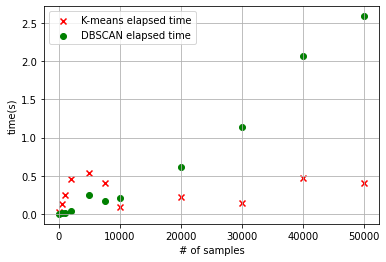

In [13]:
# DBSCAN 알고리즘과 K-means 알고리즘의 시간을 비교하는 코드 
import time

n_samples= [100, 500, 1000, 2000, 5000, 7500, 10000, 20000, 30000, 40000, 50000]

kmeans_time = []
dbscan_time = []
x = []
for n_sample in n_samples:
    dummy_circle, dummy_labels = make_circles(n_samples=n_sample, factor=0.5, noise=0.01) # 원형의 분포를 가지는 데이터 생성

    # K-means 시간을 측정
    kmeans_start = time.time()
    circle_kmeans = KMeans(n_clusters=2)
    circle_kmeans.fit(dummy_circle)
    kmeans_end = time.time()

    # DBSCAN 시간을 측정
    dbscan_start = time.time()
    epsilon, minPts = 0.2, 3
    circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    circle_dbscan.fit(dummy_circle)
    dbscan_end = time.time()

    x.append(n_sample)
    kmeans_time.append(kmeans_end-kmeans_start)
    dbscan_time.append(dbscan_end-dbscan_start)
    print("# of samples: {} / Elapsed time of K-means: {:.5f}s / DBSCAN: {:.5f}s".format(n_sample, kmeans_end-kmeans_start, dbscan_end-dbscan_start))

# K-means와 DBSCAN의 소요 시간 그래프화
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, kmeans_time, c='red', marker='x', label='K-means elapsed time')
ax.scatter(x, dbscan_time, c='green', label='DBSCAN elapsed time')
ax.set_xlabel('# of samples')
ax.set_ylabel('time(s)')
ax.legend()
ax.grid()

위에서 알 수 있듯이, 데이터의 수가 적을 때는 K-means 알고리즘의 수행 시간이 DBSCAN에 비해 더 길었으나, 군집화할 데이터의 수가 많아질 수록 DBSCAN의 알고리즘 수행 시간이 급격하게 늘어나게 된다. 또한 클러스터의 수를 지정해 줄 필요가 없으나 데이터 분포에 맞는 epsilon과 minPts의 값을 지정해 주어야 한다는 점 등이 단점으로 여겨진다.

### 차원 축소(1) PCA

비지도학습의 대표적인 방법 중 하나로 주성분분석(PCA)라는 차원 축소(Dimensionality reduction) 알고리즘이 있다. 비지도학습의 방법으로 차원 축소를 왜 사용하는지에 대해 알아보자.

예전에는 모르는 것이 있을 때, 필요한 정보를 찾을 수 있는 공간이 한정되어 있었다. 하지만 요즘에는 포털 사이트에서 궁금한 점을 검색만 하면 모르는 내용을 바로 찾아볼 수 있다. 하지만 불필요한 정보를 추천으로 많이 받을 수 있다.

차원 축소는 이처럼 수많은 정보 속에서 우리에게 더 중요한 요소가 무엇인지 알게 해주는 방법이다. 특히 비지도 학습에서는 데이터를 나타내는 여러 특징(feature)들 중에서 어떤 특징이 가장 그 데이터를 잘 표현(represent)하는지 알게 해주는 특징 추출(feature extraction)의 용도로 사용된다.

PCA를 제대로 이해하기 위해서는 선형대수라는 수학분야의 기초지식이 필요하다.



PCA는 데이터 분포의 주성분을 찾아주는 방법이다. 여기서 주성분이라는 의미는 분산이 가장 큰 방향벡터를 의미한다. PCA는 데이터들의 분산을 최대로 보존하면서, 서로 직교(orthogonal)하닌 기저(bias, 분산이 큰 방향벡터의 축)들을 찾아 고차원 공간을 저차원 공간으로 사영(projection)한다. 또한 PCA에서는 기존 feature 중 중요한 것을 선택하는 방식이 아닌 기존의 feature를 선형 결합(linear combination)하는 방식을 사용하고 있다.

여기서 직교, 기저, 사영, 선형결합이라는 수학적 용어가 등장한다.

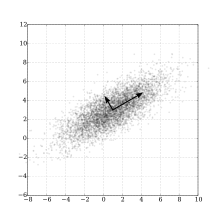

데이터들을 X-Y 좌표축 상에 표현하면 데이터가 X성분과 Y성분으로 나뉘어 표현된다는 것을 알 수 있다. 예를 들어 (1,1)이라면 X방향으로 1만큼, Y방향으로 1만큼의 위치에 존재하는 데이터라는 뜻이다.

만약에 위 그림에서 보이는 우상향 방향의 긴 화살표와 좌상향 방향의 짧은 화살표 방향을 좌표축으로 삼으면 어떨끼? 각각을 새로운 X', Y' 좌표축이라고 한다면 말이다. 아마 좌표값은 다르겠지만 얼마든지 같은 데이터를 새로운 좌표계로 변환해서 표현할 수 있다. 이렇게 새로운 좌표계 역활을 할 수 있는 벡터의 모음을 기저(basis)라고 한다. 그래서 우리가 사용하는 좌표값이란, 실은 기저의 선형결합으로 표현된 것이다. (1,1)이란 X방향 1, Y방향 1의 선형결합일 뿐이다.

위 그림과 같이 타원형 분포로 되어있는 데이터들이 있을 때, 차원의 수는 줄이면서 데이터 분포의 분산을 최대한 유지하기 위해 가장 분산이 긴축을 첫 기저로 잡고, 그 기저에 직교하는 축 중 가장 분산이 큰 값을 다음 기저로 잡게 된다. 이 과정을 반복하게 되면 차원의 수를 최대로 줄이면서 데이터 분포의 분산을 그대로 유지할 수 있다. 이것을 차원 축소라고 한다. 위 그림에서라면 여러 개의 차원으로 구성된 데이터들을 2개의 차원으로 축소해도 정보의 손실을 최소화하여 데이터의 분포를 충분히 표현할 수 있다.

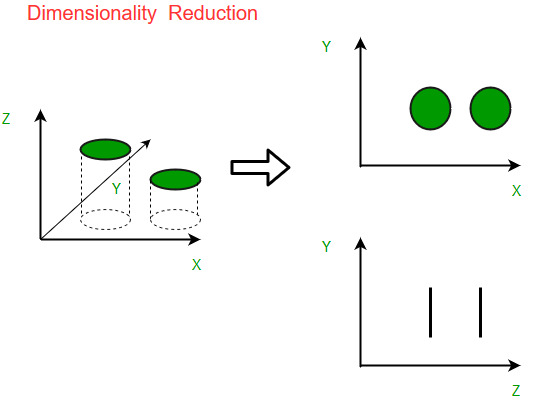

여기서 차원 축소의 핵심 개념으로 사영이라는 용어가 등장하는데, 이를 설명하기 위해 위 그림을 참고하자.

X-Y-Z 좌표축상에 존재하는 데이터를 X-Y, Y-Z 좌표축에 사영했다는 것은 각각 Z,X 좌표축을 무시했다는 뜻이 된다. 그러면 무시한 데이터만큼의 정보손실이 일어난다. 위 그림의 경우 원본 데이터의 특성을 상대적으로 잘 살리면서 차원을 1개 줄인 것은 X-Y일까? Y-Z일까? 아무래도 X-Y이다. 그렇다면 Z축 방향의 정보는 상대적으로 덜 중요하다. (수학적으로는 Z축 방향의 분산이 작다.)고 할 수 있다.

PCA는 차원축소를 시도하되, 주어진 좌표축 방향이 아니라, 가장 분산이 길게 나오는 기저방향을 찾아서 그 방향의 기저만 남기고, 덜 중요한 기저 방향을 삭제하는 방식으로 진행된다. 이렇게 찾은 가장 중요한 기저를 주성분 방향 또는 pc축이라고 한다.

#### 1. 데이터 개요

In [14]:
# 차원 축소 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y=0(Malignant:악성 종양), y=1(Benign:양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


차원 축소를 위해 scikit-learn 라이브러리에서 불러온 유방암 데이터셋이다. 총 30개의 feature로 구성이 되어 있고 데이터의 수는 569 rows, 각각의 row에 해당 환자가 악성 종양(malignant, 0)을 가지고 있는지, 양성 종양(benign, 1)을 가지고 있는지 라벨링이 되어 있다.

이번에는 유방암 데이터셋을 훈련, 테스트 데이터셋으로 나누고, 훈련 데이터셋과 테스트 데이터셋 각각에 PCA를 적용해 볼 거다. 그리고 나서 차원 축소를 적용하지 않은 original data와 PCA를 적용한 data를 이용하여 SVM classifier를 훈련시킨 후, 각각의 테스트 데이터셋을 통해 정확도를 확인하는 코드를 직접 실행해 봄으로써 PCA가 어떤 효과를 가져다주는지 확인해보자.

#### 2. 유방암 데이터셋에 PCA 알고리즘 적용 예제

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter

# color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'red', 3:'blue'}
target_dict = {0: 'malignant_train', 1: 'benign_train', 2: 'malignant_test', 3:'benign_test'}

#Train data에 PCA 알고리즘 적용
train_X_ = StandardScaler().fit_transform(train_X) # 불러온 데이터에 대한 정규화 -> 각 column의 range of value가 전부 다르기 때문에 정규화를 진행해 주어야 합니다.
train_df = pd.DataFrame(train_X_, columns=cancer['feature_names'])
pca = PCA(n_components=2) # 주성분의 수를 2개, 즉 기저가 되는 방향벡터를 2개로 하는 PCA 알고리즘 수행
pc = pca.fit_transform(train_df)

여기서 StandScaler().fit_transform() 과정을 수행하는 이유는 각 열마다의 값의 범위가 전부 달라서 그렇습니다. 예를 들어, 첫 번째와 두 번째 열 데이터인 'mean radius'와 'mean texture'의 범위는 다른데, 두 값이 전부 5라는 값을 가진다고 해서 같은 영향을 준다고 취급하면 안 된다.

In [16]:
#Test data에 PCA 알고리즘 적용
test_X_ = StandardScaler().fit_transform(test_X) # normalization
test_df = pd.DataFrame(test_X_, columns=cancer['feature_names'])
pca_test = PCA(n_components=2)
pc_test = pca_test.fit_transform(test_df)

Test data에 대해서도 똑같이 PCA를 적용해 준다.

In [17]:
# 훈련한 classifier의 decision boundary를 그리는 함수
def plot_decision_boundary(X, clf, ax): 
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap='Blues')

# PCA를 적용한 train data의 classifier 훈련: classfier로 Support Vector Machine(SVM) 사용
clf = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf.fit(pc, train_y) # train data로 classifier 훈련

# PCA를 적용하지 않은 original data의 SVM 훈련
clf_orig = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf_orig.fit(train_df, train_y)

SVC(C=0.8, gamma=0.5)

여기서는 서포트 벡터 머신 분류기(SVM classifier)를 훈련시켜 준다. 이 SVM classifier는 주성분(PC)을 기반으로 해당 점이 양성인지 악성인지를 구분해 주는 결정 경계선(decision boundary)에 해당하는데, train data에 맞게 경계선이 그어질 수 있도록 이를 훈련시키는 단계에 해당한다.

PCA 분석을 사용한 Test dataset accuracy: 54명/57명 => 0.947
PCA를 적용하지 않은 Test dataset accuracy: 43명/57명 => 0.754


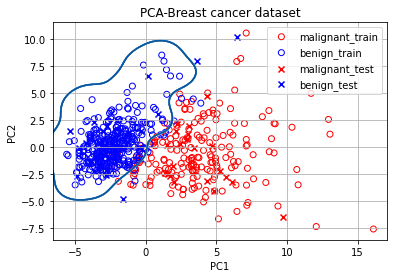

In [18]:
# 캔버스 도식
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# malignant와 benign의 SVM decision boundary 그리기
plot_decision_boundary(pc, clf, ax)

#Train data 도식
for cluster in range(2):
    sub_cancer_points = pc[train_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], edgecolor=color_dict[cluster], c='none', label=target_dict[cluster])
#Test data 도식
for cluster in range(2):
    sub_cancer_points = pc_test[test_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], marker= 'x', c=color_dict[cluster+2], label=target_dict[cluster+2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA-Breast cancer dataset')
ax.legend()
ax.grid()

# Scoring
pca_test_accuracy_dict = Counter(clf.predict(pc_test) == test_y)
orig_test_accuracy_dict = Counter(clf_orig.predict(test_df) == test_y)

print("PCA 분석을 사용한 Test dataset accuracy: {}명/{}명 => {:.3f}".format(pca_test_accuracy_dict[True], sum(pca_test_accuracy_dict.values()), clf.score(pc_test, test_y)))
print("PCA를 적용하지 않은 Test dataset accuracy: {}명/{}명 => {:.3f}".format(orig_test_accuracy_dict[True], sum(orig_test_accuracy_dict.values()), clf_orig.score(test_df, test_y)))

굉장히 놀랍다

단 2개의 주성분 feature 만으로 분류한 PCA classifier의 정확도가 30개의 feature를 모두 사용한 original classifier보다 훨씬 높은 분류 정확도를 보여준다. 모든 feature를 이용한 방식의 정확도가 더 낮은 이유 중 하나는 바로 제공된 30개의 feature 중 종양의 악성/양성과 관련 없는 것이 존재해서 해당 feature가 오히려 분류를 방해했기 때문이다.

그래서 feature의 수가 적더라도, 악성/양성과 관련이 깊은 중요한 feature만을 이용한 분류의 정확도가 훨씬 더 높을 수 있다. 위 유방암 데이터셋에서 살펴보았듯이, PCA는 각 feature 간 상관관계가 있고 이를 추릴 필요가 있을 때 유용하게 사용되는 비지도학습 방법 중 하나이다.

### 차원 축소 (2) T-SNE

우리의 현실 세계는 3차원이며, 우리는 그 이상의 차원을 표현하거나 눈으로 보고 인지하기 어렵다. 이런 이유로, 우리는 고차원의 데이터를 1~3차원으로 불러들여와야 비로소 데이터를 시각적으로 이해할 수 있게 된다.

이 시각화도 PCA로 다 되는 거 아닌가라고 생각한다. 하지만, 차원축소를 하는 목적에 따라 데이터의 어떤 정보를 보존할 것이냐에 따라 적합한 알고리즘이 따로 있다.

예를 들어, PCA는 주로 선형적인 데이터의 분포(키와 몸무게)를 가지고 있을 때, 정보가 가장 잘 보존된다.

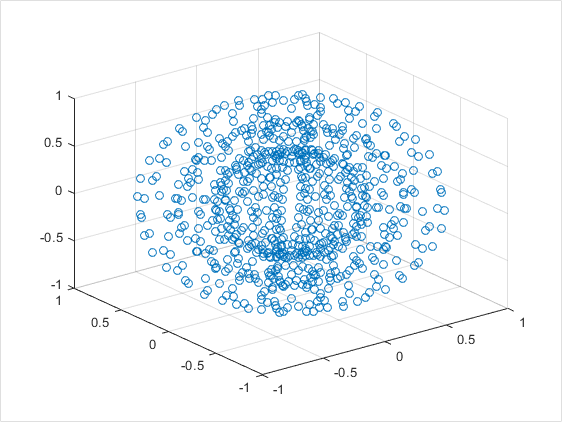

위의 이미지처럼 방사형적, 비선형적 데이터에서는 많은 정보량을 담기 위한 주성분(Principal Component)으로 잡을 선형적인 축을 찾기가 어렵다. 따라서, 위 데이터를 PCA를 이용해 2차원으로 표현한다면, 멀리 있는 데이터가 가까이 있도록 차원축소가 이루어질 것이다. 시각화하여 데이터를 이해한다는 목적과는 잘 맞지 않는다.

우리가 배워볼 T-SNE는 기존 차원의 공간에서 가까운 점들은, 차원축소된 공간에서도 여전히 가깝게 유지되는 것을 목표로 하고 있다. 이 특징 덕분에, 이후 실습에서 MNIST의 784차원의 숫자 이미지를 2차원으로 시각화하여도, 같은 숫자의 이미지끼리 유사한 거리에 놓이는 것을 확인할 수 있다.

즉, PCA는 데이터가 가진 고유한 물리적 정보량을 보존하는데 주력하지만, T-SNE는 고유한 물리적 정보량보다는 데이터들 간의 상대적 거리를 보존하는데 주력한다.

이제 T-SNE의 시각화 특징을 PCA와 비교하여 살펴볼 것이다.

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
from scipy.io import arff
import pandas as pd
import os

# 784 pixel로 이뤄진 mnist 이미지 데이터 호출
path = '/content/drive/MyDrive/mnist_784.arff'
mnist = arff.loadarff(path)

사용하기 쉽게 판다스 데이터프레임으로 만들어 주겠다

In [22]:
df = pd.DataFrame(mnist[0])
df['label'] = df['class'].apply(lambda i : str(i)[2])

n_image = mnist[0].shape[0]
pixel_columns = list(df.columns[:-2])

7만 개의 이미지 데이터 중 1만 개를 랜덤샘플링한다.

In [23]:
import numpy as np

# 결과가 재생산 가능하도록 랜덤 시드를 지정합니다.
np.random.seed(30)

# 이미지 데이터의 순서를 랜덤으로 뒤바꾼(permutation) 배열을 담습니다.
rndperm = np.random.permutation(n_image)

# 랜덤으로 섞은 이미지 중 10,000개를 뽑고, df_subset에 담습니다.
n_image_sample = 10000
random_idx = rndperm[:n_image_sample]
df_subset = df.loc[random_idx,:].copy()
df_subset.shape

(10000, 786)

판다스 데이터프레임에 올린 데이터셋을 matplot 라이브러리를 사용해서 확인해 보자.

<Figure size 432x288 with 0 Axes>

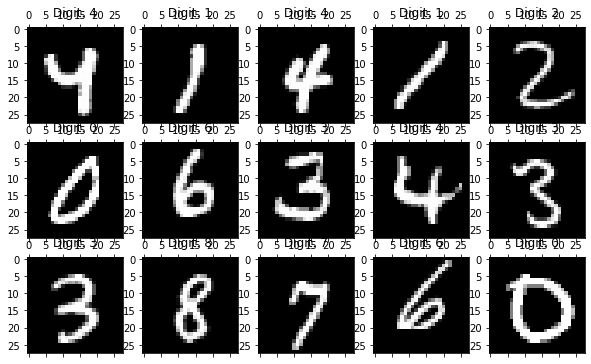

In [24]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.gray()
fig = plt.figure( figsize=(10,6) )
n_img_sample = 15
width,height = 28,28

# 15개 샘플을 시각화해 봅니다. 
for i in range(0,n_img_sample):
    row = df_subset.iloc[i]
    ax = fig.add_subplot(3,5,i+1, title=f"Digit: {row['label']}")
    ax.matshow(row[pixel_columns]
               .values.reshape((width,height))
               .astype(float))

plt.show()

#### PCA를 이용한 MNIST 차원축소

In [25]:
from sklearn.decomposition import PCA

print("df_subset의 shape: {}".format(df_subset.shape))

n_dimension = 2 # 축소시킬 목표 차원의 수
pca = PCA(n_components=n_dimension)

pca_result = pca.fit_transform(df_subset[pixel_columns].values) # 차원을 축소한 결과
df_subset['pca-one'] = pca_result[:,0] # 축소한 결과의 첫 번째 차원 값
df_subset['pca-two'] = pca_result[:,1] # 축소한 결과의 두 번째 차원 값

print("pca_result의 shape: {}".format(pca_result.shape))

df_subset의 shape: (10000, 786)
pca_result의 shape: (10000, 2)


Principal Component 별로 보존하는 정보량을 확인한다.

1. 차원을 축소한 댓가로 차원의 정보량 중 일부만 남게 된다.

2. sklearn의 PCA 모듈은 pc 축 마다 보전하는 정보량의 비율을 제시해 준다.

In [26]:
print(f"pca-1: {round(pca.explained_variance_ratio_[0],3)*100}%")
print(f"pca-2: {round(pca.explained_variance_ratio_[1],3)*100}%")

pca-1: 9.6%
pca-2: 7.3%


784차원을 2차원으로 차원축소 하였을 때, 정보량이 전체의 16.9%가 남게 된다..

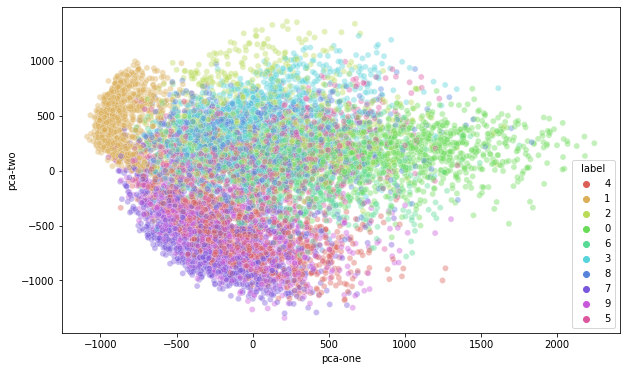

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,   # 2개의 PC축만 남은 데이터프레임 df_subset 을 시각화해 보자.
    legend="full",
    alpha=0.4
)

1. PCA로 784차원을 2차원으로 줄인 결과 벡터를 Scatter 그래프로 그려보았다.

2. 같거나 모양이 비슷한 숫자 이미지가 유사한 벡터값을 갖는 것을 색상으로 확인할 수 있다.

#### T-SNE를 이용한 MNIST 차원축소

T-SNE 모듈을 사용하여 동일한 1만 개의 이미지 데이터의 차원을 축소해 보겠다.

In [28]:
from sklearn.manifold import TSNE

print("df_subset의 shape: {}".format(df_subset.shape))

data_subset = df_subset[pixel_columns].values
n_dimension = 2
tsne = TSNE(n_components=n_dimension)
tsne_results = tsne.fit_transform(data_subset)

print("tsne_results의 shape: {}".format(tsne_results.shape))

df_subset의 shape: (10000, 788)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


tsne_results의 shape: (10000, 2)


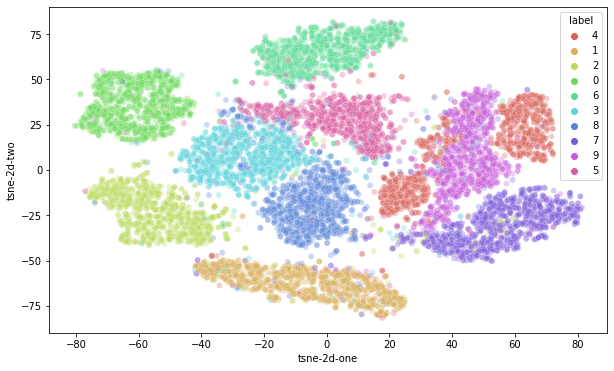

In [29]:
# tsne 결과를 차원별로 추가합니다.
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

# 시각화해 봅니다.
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

차이점이 뚜렷하게 보이는가?

이것은 PCA와 구분되는 T-SNE의 뚜렷한 특징이다. PCA를 통해 차원축소를 하면서 발생하는 정보 손실의 과정 중에는 두 점 사이의 거리라는 중요한 정보가 함께 손실되는 측면이 있다. 만약 두 점의 거리가 PCA의 PC축을 따라 발생한 거리라면 유지가 되겠지만, 그렇지 않다면 PCA 과정을 통해 두 점 사이의 거리가 소거되고, 실제로는 먼 거리의 점들이 아주 가까운 점으로 투영될 가능성이 있다.

그 결과로 이전 스텝에서 PCA의 시각화 화면을 보면 다른 숫자들 사이의 경계가 불분명할 정도로 분포가 뒤섞여 있는 것을 확인할 수 있다.

반면에, T-SNE에서는 고차원에서 먼 거리의 두 점은 저차원에서도 먼 거리에 있어야 한다. 그러므로 결과적으로 T-SNE를 시각화하면 숫자들 사이의 경계가 뚜렷이 나타나는 장점이 있다. 위에서 T-SNE를 훈련시켰을 때 label 정보를 전혀 참조하지 않고 df_subset[pixel_columns] 정보만 참고하여 얻은 결과라는 점에 주목하자. 그래서 T-SNE는 분류기의 Feature Extractor 모델이 카테고리 간 분류 경계선을 뚜렷하게 유지하고 있는지를 확인하는 용도로 자주 쓰인다.

그러면 T-SNE는 PCA보다 우월한 차원축소 기법일까? 그렇지 않다.

T-SNE의 두 차원은 물리적 의미를 가지지 않는다. PCA는 정보 손실을 최소화하려는 관점을 가지고 있으므로, 그 결과 추출된 PC축은 주성분이라는 물리적 의미를 유지하고 있으며, 공분산을 통해 원본 데이터를 일정 부분 복원할 수 있는 가능성을 가지고 있다. 그러나 T-SNE는 정보 손실량에 주목하지 않으며, 그 결과 저차원 축이 아무런 물리적 의미를 가지지 못한다. 오직 시각화에만 유리할 뿐이다.



### 정리

이 이외에도 딥러닝(GAN)등 유용한 비지도 학습이 있다.

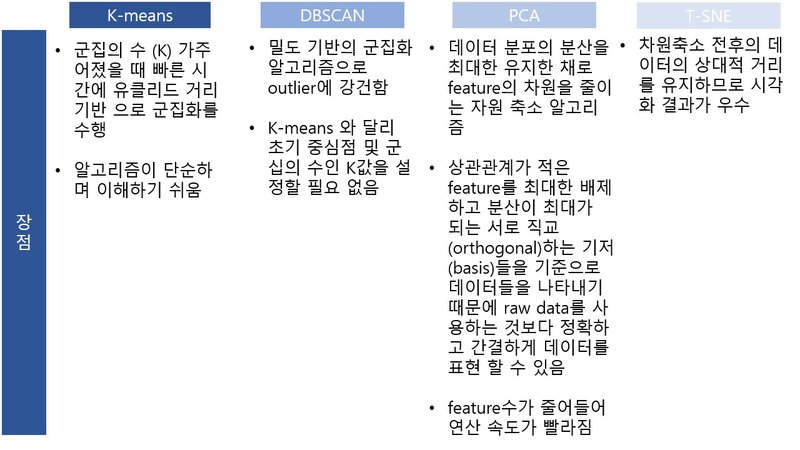